<a href="https://colab.research.google.com/github/stev0NaN/performancetest/blob/main/PrimeraEntrega_SanchezdelaBarquera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Abstract**





El análisis de datos proporcionados por un GPS es una herramienta valiosa para mejorar el rendimiento de un equipo de fútbol soccer.

Este tipo de análisis permite identificar patrones de movimiento, niveles de esfuerzo y otros datos clave que pueden ser utilizados para optimizar el entrenamiento y la estrategia del equipo.

La audiencia para esta presentación puede incluir entrenadores, jugadores y otros miembros del equipo, así como analistas deportivos.

#**Definición de Objetivo**

La motivación para presentar este análisis de datos es mejorar el rendimiento del equipo y lograr resultados exitosos en el campo de juego.

#**Contexto Empresarial**

El equipo de primera división llamado WIMU TEAM ha decidido tomar en cuenta los datos GPS que sus jugadores del primer equipo tienen durante la semana de prueba de la nueva herramienta para gestionar los entrenamientos y sacar el máximo provecho a cada uno de ellos.

#**Problema Comercial**

Su tarea es interpretar los datos que generan los GPS y generar visualizaciones que respondan las preguntas específicas que tiene el staff de entrenadores, las cuales vemos a continuación:

1.¿Qué tipo de entrenamiento es más popular?

2.¿Qué días de la semana es cuando más carga de trabajo en metros recorridos hay?

3.¿Cuáles son los jugadores con la mayor distancia recorrida?

4.¿Quiénes son los jugadores más veloces? y si existe alguna correlación respecto a su posición en el terreno de juego.

#**Contexto Analítico**

El conjunto de datos "week_sessions" es un archivo en formato CSV que contiene información sobre las sesiones de entrenamiento de los usuarios de una plataforma de monitoreo GPS durante una semana.

El archivo contiene 18 columnas y 548 filas de datos.

Cada fila representa un jugador del equipo, y las columnas proporcionan información sobre la sesión, como el identificador de usuario, la fecha, la duración de la sesión, el tipo de sesión, la distancia recorrida durante la sesión, la distancia recorrida entre intervalos de velocidad y la máxima velocidad alcanzada en Km/h.

#**Análisis Exploratorio de Datos (EDA)**

##**Carga del Dataset**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



url = 'https://raw.githubusercontent.com/stev0NaN/performancetest/main/week_sessions.csv'

df = pd.read_csv(url)
df = pd.DataFrame(df)

df.head()

,Username,Position,Team Name,Session Date,Match Day,Session Type,Session Name,Task Name,Player Duration,Distance (m),"Speed Zones (m) [0.0, 6.0]","Speed Zones (m) [6.0, 12.0]","Speed Zones (m) [12.0, 18.0]","Speed Zones (m) [18.0, 21.0]","Speed Zones (m) [21.0, 24.0]","Speed Zones (m) [24.0, 50.0]",Max Speed (km/h),Max Speed (Historical Player Maximum)
0,phillippfarber,Midfielder,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,8133.592821,2821.838135,2873.652588,1458.796509,426.581787,343.451843,209.272110,31.161600,36.390000
1,nereomarino,Centre Back,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,5086.417666,2020.478394,2062.734131,899.350403,83.303360,20.551388,0.000000,23.587200,33.570000
2,patrickkrueger,Midfielder,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:29:15,718.713690,431.481506,273.783447,13.448741,0.000000,0.000000,0.000000,15.706800,34.247002
3,marvinsharpe,Winger,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,9572.792150,4374.458008,2901.281006,1594.261841,330.291931,249.323852,123.175400,31.323601,37.723999
4,kianlong,Right Back,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,8278.748661,3404.831299,2830.495605,1655.305176,237.453812,91.589828,59.072899,31.226398,37.720000


In [ ]:
df.shape

(574, 18)

In [ ]:
df.columns

Index(['Username', 'Position', 'Team Name', 'Session Date', 'Match Day',
       'Session Type', 'Session Name', 'Task Name', 'Player Duration',
       'Distance (m)', 'Speed Zones (m) [0.0, 6.0]',
       'Speed Zones (m) [6.0, 12.0]', 'Speed Zones (m) [12.0, 18.0]',
       'Speed Zones (m) [18.0, 21.0]', 'Speed Zones (m) [21.0, 24.0]',
       'Speed Zones (m) [24.0, 50.0]', 'Max Speed (km/h)',
       'Max Speed (Historical Player Maximum)'],
      dtype='object')

In [ ]:
jugador = df['Username']
jugador.drop_duplicates(inplace = True)

posiciones = df['Position']
posiciones.drop_duplicates(inplace = True)

In [ ]:

df1 = df.drop(['Username','Position','Team Name','Session Type','Match Day','Session Name','Task Name', 'Player Duration',	'Speed Zones (m) [0.0, 6.0]', 'Speed Zones (m) [6.0, 12.0]', 'Speed Zones (m) [12.0, 18.0]', 'Speed Zones (m) [18.0, 21.0]',	'Speed Zones (m) [21.0, 24.0]',	'Speed Zones (m) [24.0, 50.0]',	'Max Speed (km/h)',	'Max Speed (Historical Player Maximum)'], axis=1)

df1 = df1.set_index('Session Date')

#df1

In [ ]:
df2 = df.drop(['Session Date','Team Name','Session Type','Match Day','Session Name','Task Name', 'Player Duration',	'Speed Zones (m) [0.0, 6.0]', 'Speed Zones (m) [6.0, 12.0]', 'Speed Zones (m) [12.0, 18.0]', 'Speed Zones (m) [18.0, 21.0]',	'Speed Zones (m) [21.0, 24.0]',	'Speed Zones (m) [24.0, 50.0]',	'Max Speed (Historical Player Maximum)'], axis=1)

#df2 = df2.set_index('Session Date')

df2

,Username,Position,Distance (m),Max Speed (km/h)
0,phillippfarber,Midfielder,8133.592821,31.161600
1,nereomarino,Centre Back,5086.417666,23.587200
2,patrickkrueger,Midfielder,718.713690,15.706800
3,marvinsharpe,Winger,9572.792150,31.323601
4,kianlong,Right Back,8278.748661,31.226398
...,...,...,...,...
569,davutmeijs,Winger,1086.832229,25.362000
570,luisribeiro,Winger,1198.952413,29.087999
571,marmion,Left Back,981.093150,25.358400
572,nereomarino,Centre Back,911.921996,27.831600


##**Análisis Exploratorio de Datos (Respondiendo Preguntas del Cliente)**

Con el siguiente gráfico encontramos que el entrenamiento táctico colectivo tiene la mayor densidad de entrenamiento dentro de las sesiones. Lo cual nos podría indicar que el tipo de entrenamiento llevado a cabo forma parte de las nuevas tendencias en entrenamiento como lo es la Periodización Táctica o el Entrenamiento Estructurado, donde en la sesión no se separa ninguno de los elementos del juego para entrenarlos por separado.

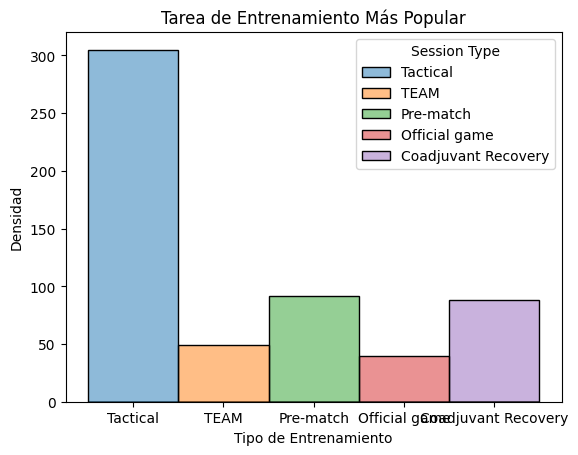

In [ ]:
ax=sns.histplot(
    data=df, hue="Session Type",
    x="Session Type")
ax.set(xlabel='Tipo de Entrenamiento', ylabel='Densidad', title='Tarea de Entrenamiento Más Popular')
 
plt.rc('xtick', labelsize=7)
plt.show()



Aquí podemos identificar el día de la semana que más carga en distancia tenemos.

Y nos arroja un dato importante y es que el fin de semana en sábado es el día que mayor carga tenemos ya que es el día de juego oficial y por obviedad la competencia genera mayor carga. Lo que nos indica que la carga semanal de entrenamiento de la resistencia no está llegando a valores cercanos a la competencia por lo tanto se dería ajustar la carga para que los estímulos en los días de entrenamiento de la resistencia sean lo más parecidos al día de competencia.


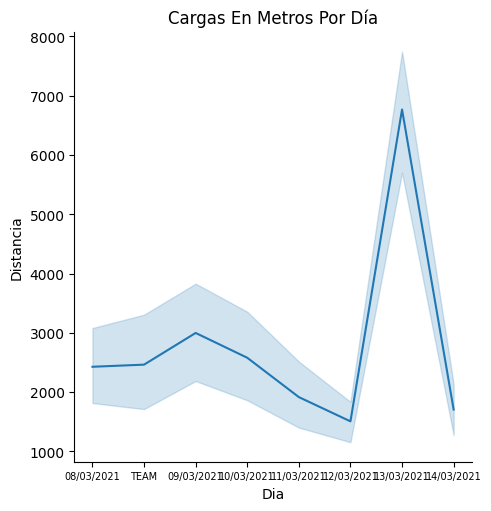

In [ ]:
ax= sns.relplot(x = "Session Date", y = "Distance (m)", data = df1, kind = "line")
ax.set (xlabel='Dia', ylabel='Distancia', title='Cargas En Metros Por Día')
plt.rc('xtick', labelsize=5)
plt.show()



Con la suma de metros por jugador encontramos que hay jugadores que tienen una elevada carga con respecto al de otros jugadores, debido a que las posiciones de los jugadores que están bajos en distancia, nos pueden decir que dentro de las tareas de entrenamiento o incluso juegos oficiales han tenido un rendimiento mas bajo de lo normal. O nos podría indicar jugadores que están apartados del entrenamiento haciendo tareas diferenciadas debido a una lesión.

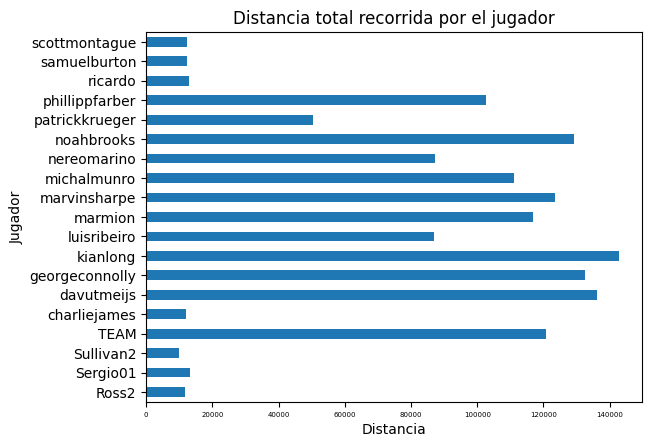

In [ ]:
df2.groupby('Username')['Distance (m)'].sum().plot(kind='barh')

plt.xlabel('Distancia')
plt.ylabel('Jugador')
plt.title('Distancia total recorrida por el jugador')
plt.show()

Con este gráfico de cajas podemos observar a los jugadores y su posición y quienes fueron los que alcanzan mayor velocidad durante la semana.

Descubrimos que las posiciones tienen un pico de velocidad máxima alcanzada similar y los valores por debajo nos hablan de aspectos tacticos que pudieran repercutir en el desempeño del equipo, vemos la posición de defensor central que tiene valores muy bajos lo cual nos habla de que el jugador pudo haber estado caminando y desconectado de las fases del juego; vemos también valores bajos en extremos y laterales lo cual nos hablaría que están teniendo regresos a defender la posición muy lenta.

Cabe destacar el trabajo de los medicampistas ya que pasan por la mayoría de las zonas de velocidad, por lo tanto nos indica una implicación máxima en el juego y con el equipo estando atentos a las transiciones, apoyos, desmarques, etc.

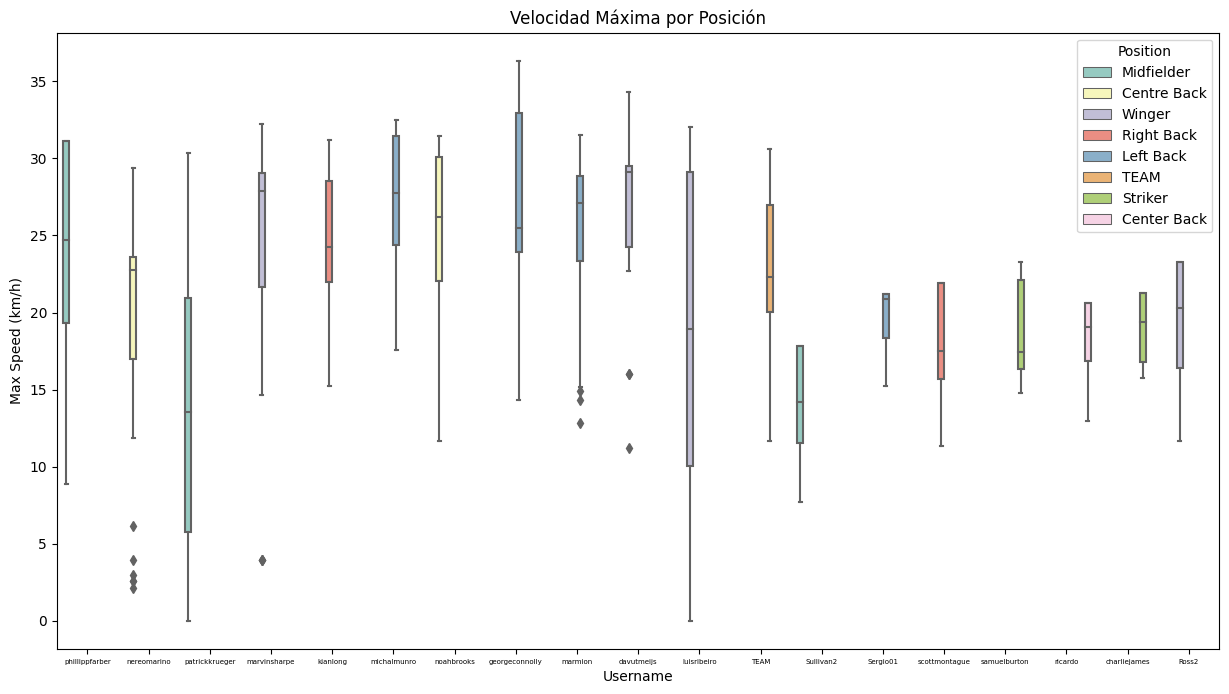

In [ ]:
ax = plt.subplots(figsize = (15, 8))

ax=sns.boxplot(data=df2, x="Username", y="Max Speed (km/h)",  palette = "Set3", hue= 'Position')
ax.set(title='Velocidad Máxima por Posición')
plt.rc('xtick', labelsize=6)
plt.show()

# **Feature Selection**

Antes de comenzar, podemos observar que dentro del dataset hay algunas variables que con seguridad no aportarian en nada a la prediccion de la velocidad máxima. Como por ejemplo 'Team Name', 'Match Day', 'Session Type', 'Session Name', 'Task Name', 'Player Duration' por ello es que eliminamos del dataset.
Y volvemos index el Username asociado a cada uno de los jugadores.

In [ ]:
df_featsel = df.drop(['Team Name', 'Match Day', 'Session Type', 'Session Name', 'Task Name', 'Player Duration', 'Session Date'], axis=1)

In [ ]:
df_featsel = df_featsel.set_index('Username')

In [ ]:
#Reemplazar el nombre de posición Centre Back por Center Back para que esté normalizado el nombre de la posición

df_featsel = df_featsel.replace('Centre Back', 'Center Back')

df_featsel.head()

,Position,Distance (m),"Speed Zones (m) [0.0, 6.0]","Speed Zones (m) [6.0, 12.0]","Speed Zones (m) [12.0, 18.0]","Speed Zones (m) [18.0, 21.0]","Speed Zones (m) [21.0, 24.0]","Speed Zones (m) [24.0, 50.0]",Max Speed (km/h),Max Speed (Historical Player Maximum)
Username,,,,,,,,,,
phillippfarber,Midfielder,8133.592821,2821.838135,2873.652588,1458.796509,426.581787,343.451843,209.272110,31.161600,36.390000
nereomarino,Center Back,5086.417666,2020.478394,2062.734131,899.350403,83.303360,20.551388,0.000000,23.587200,33.570000
patrickkrueger,Midfielder,718.713690,431.481506,273.783447,13.448741,0.000000,0.000000,0.000000,15.706800,34.247002
marvinsharpe,Winger,9572.792150,4374.458008,2901.281006,1594.261841,330.291931,249.323852,123.175400,31.323601,37.723999
kianlong,Right Back,8278.748661,3404.831299,2830.495605,1655.305176,237.453812,91.589828,59.072899,31.226398,37.720000


In [ ]:
#Eliminar las filas de TEAM y una que se creo al modificar el nombre de la posición Centre Back.

df_featsel = df_featsel.drop(["TEAM"], axis =0)


El siguiente paso es convertir las variables categoricas en variables numericas para poder utilizar los algoritmos de reduccion de variables y los modelos de regresion. Realizaremos previamente tratamiento de datos nulos o faltantes, se comprueba que no tenemos valores nulos, procederemos a codificar las variables no numericas.

<Axes: ylabel='Username'>

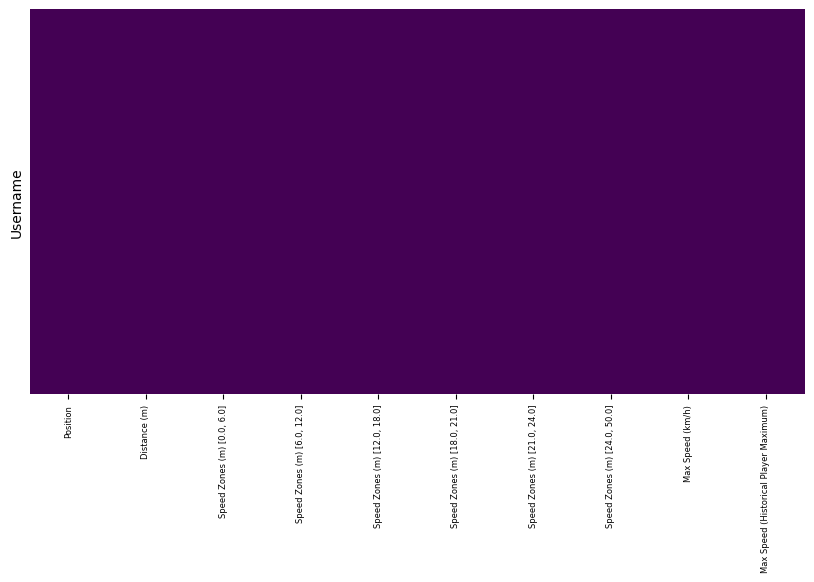

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_featsel.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Ahora que no tenemos valores erróneos o nulos, vamos a codificar la variable no numérica.

In [ ]:
#Importamos el labelencoder de scikit
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()


#convertimos en dato número la posición del jugador.
df_featsel['Position'] = LE.fit_transform(df_featsel['Position'])
df_featsel.shape

(525, 10)

In [ ]:
df_featsel['Position'].unique()

array([2, 0, 5, 3, 1, 4])

Realizaremos un analisis de componentes principales para tratar de determinar cual es el numero adecuado de variables a conservar en el modelo.

In [ ]:
#importamos el modulo de PCA de scikit learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Escalar datos de las variables para que no sean números tan altos en velocidad.
df_escalado = StandardScaler().fit_transform(df_featsel)
print(df_escalado)
df_escalado.shape

[[-0.18704794  1.86285331  1.50541415 ...  3.56695152  1.0742553
   1.04072759]
 [-1.2602738   0.85820494  0.83854924 ... -0.55025099  0.06774252
  -0.27044638]
 [-0.18704794 -0.58181949 -0.4837611  ... -0.55025099 -0.97943269
   0.04432924]
 ...
 [ 1.42279086 -0.42348562 -0.46251748 ... -0.18980965  0.79870797
  -0.39598416]
 [-0.72366087 -0.49531344 -0.46502396 ... -0.45104928  0.3031058
  -0.27044638]
 [-1.2602738  -0.51811905 -0.51902454 ... -0.3801787   0.63175325
  -0.27044638]]


(525, 10)

Text(0, 0.5, 'Varianza Explicada')

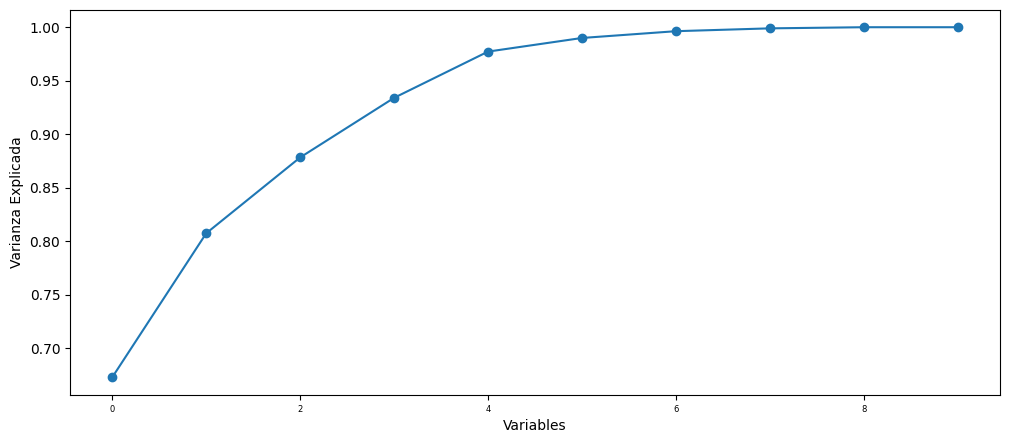

In [ ]:
#iniciamos el objeto de PCA
pca = PCA()
pca.fit(df_escalado)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(),marker="o")
plt.xlabel("Variables")
plt.ylabel("Varianza Explicada")

In [ ]:
print("Varianza explicada por las primeras 3 variables principales =",np.cumsum(evr*100)[3])

Varianza explicada por las primeras 3 variables principales = 93.39603789894774


Con el analisis de componentes principales podemos deducir que las primeras 3 variables del dataset explican el 93% de la varianza del dataset, por lo que ahora realizaremos la seleccion de variables con k=3

In [ ]:
x = df_featsel.drop('Max Speed (km/h)',1)
y = df_featsel['Max Speed (km/h)']
x.head()

<ipython-input-23-b3fcf0c08dab>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_featsel.drop('Max Speed (km/h)',1)


,Position,Distance (m),"Speed Zones (m) [0.0, 6.0]","Speed Zones (m) [6.0, 12.0]","Speed Zones (m) [12.0, 18.0]","Speed Zones (m) [18.0, 21.0]","Speed Zones (m) [21.0, 24.0]","Speed Zones (m) [24.0, 50.0]",Max Speed (Historical Player Maximum)
Username,,,,,,,,,
phillippfarber,2,8133.592821,2821.838135,2873.652588,1458.796509,426.581787,343.451843,209.272110,36.390000
nereomarino,0,5086.417666,2020.478394,2062.734131,899.350403,83.303360,20.551388,0.000000,33.570000
patrickkrueger,2,718.713690,431.481506,273.783447,13.448741,0.000000,0.000000,0.000000,34.247002
marvinsharpe,5,9572.792150,4374.458008,2901.281006,1594.261841,330.291931,249.323852,123.175400,37.723999
kianlong,3,8278.748661,3404.831299,2830.495605,1655.305176,237.453812,91.589828,59.072899,37.720000


In [ ]:
y.head()

Username
phillippfarber    31.161600
nereomarino       23.587200
patrickkrueger    15.706800
marvinsharpe      31.323601
kianlong          31.226398
Name: Max Speed (km/h), dtype: float64

In [ ]:
!pip install mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=3,
          forward=True,
          scoring = 'r2',
          cv=None)

In [ ]:
#Lista final de features
sfs.fit(x, y)

SequentialFeatureSelector(cv=None, estimator=LinearRegression(),
                          k_features=(3, 3), scoring='r2')

In [ ]:
#Variables que el algoritmo seleccionó

sfs.k_feature_names_

('Speed Zones (m) [6.0, 12.0]',
 'Speed Zones (m) [18.0, 21.0]',
 'Speed Zones (m) [24.0, 50.0]')

#**Modelo de prediccion con regresion lineal**

Modelo con todas las variables
Primero crearemos el modelo de regresion lineal utilizando todas las variables

In [ ]:
#Generamos el set de entrenamiento y el set de validacion
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

df_x = x
df_y = y

In [ ]:
from sklearn.model_selection import train_test_split

#Generamos el set de entrenamiento y el set de validacion
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=42)


from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# Predecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
#probamos el rendimiento del modelo
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print("R2:",r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.3711645577339219
MSE: 33.66678366254482
RMSE: 5.802308477024022
MAE: 4.459799673962279


Text(0.5, 1.0, 'Valor esperado vs Valor predicho')

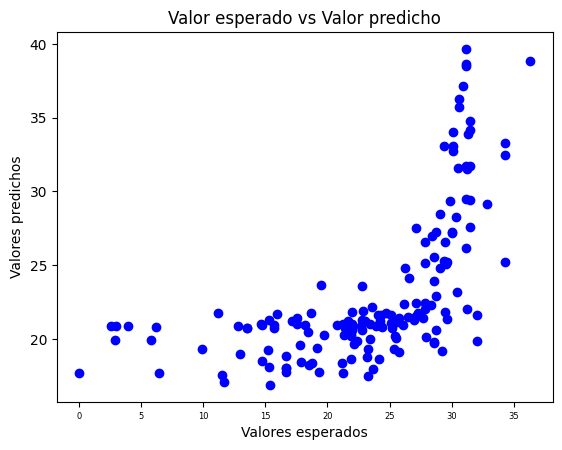

In [ ]:
#graficamos valor esperado vs valor de prediccion
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel("Valores esperados")
plt.ylabel("Valores predichos")
plt.title("Valor esperado vs Valor predicho")  

##Modelo con 3 variables
Ahora crearemos el modelo con las variables escogidas en Feature Selection

In [ ]:
df_featsel_x= sfs.transform(x)
df_featsel_x.shape

(525, 3)

In [ ]:
#Generamos el set de entrenamiento y el set de validacion
x_fs_train,x_fs_test,y_fs_train,y_fs_test = train_test_split(df_featsel_x, df_y, test_size=0.3,random_state=42)
# crear el modelo
lr_fs = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr_fs.fit(x_fs_train,y_fs_train)
# Predecir con X_test
y_fs_pred = lr_fs.predict(x_fs_test)

In [ ]:
#probamos el rendimiento del modelo
r2_fs = r2_score(y_fs_test,y_fs_pred)
print(r2_fs)
mse = mean_squared_error(y_fs_test,y_fs_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_fs_test,y_fs_pred)
print("R2:",r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

0.41752774335471243
R2: 0.3711645577339219
MSE: 31.184577292979057
RMSE: 5.5843152931204605
MAE: 4.311229659193524


Text(0.5, 1.0, 'Valor esperado vs Valor predicho')

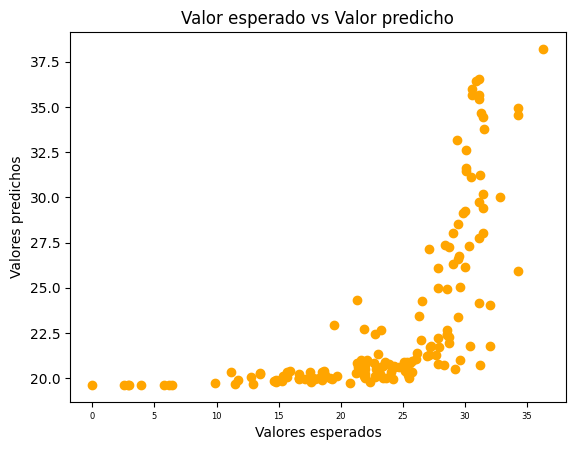

In [ ]:
#graficamos valor esperado vs valor de prediccion
plt.scatter(y_fs_test, y_fs_pred, color = 'orange')
plt.xlabel("Valores esperados")
plt.ylabel("Valores predichos")
plt.title("Valor esperado vs Valor predicho")  

# **Evaluando Modelos (Bias-Variance Tradeoff) Actividad Complementaria**

A continuacion vamos a emplear una libreria que nos permitira calcular el bias-variance trade off del modelo, asi podremos tomar decisiones que reduzcan el posible overfitting o underfitting.

In [ ]:
#importamos la libreria
#Ejecutar el siguiente código si no reconoce el mxltend

#%pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
#el metodo no admite dataframes todavia, es necesario convertir los dataframes a arrays
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
#calculamos la varianza, el bias y el error del modelo
mse, bias, var = bias_variance_decomp(lr, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)

In [ ]:
#Imprimimos los resultados
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 34.606
Bias: 33.775
Variance: 0.831


Ahora calcularemos para el modelo con 3 variables del feature selection

In [ ]:
y_fs_train = y_fs_train.values
y_fs_test = y_fs_test.values

In [ ]:
mse, bias, var = bias_variance_decomp(lr_fs, x_fs_train, y_fs_train, x_fs_test, y_fs_test, loss='mse', num_rounds=200, random_seed=1)


In [ ]:
#Imprimimos los resultados
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 31.536
Bias: 31.185
Variance: 0.350


#**Conclusiones**

In [ ]:
print("Rendimiento del modelo con Regresión Linear:",round(r2_fs*100,3),'%')

Rendimiento del modelo con Regresión Linear: 41.753 %


Podemos observar que el rendimiento del modelo con las variables escogidas en feature selection es de 41.75%.

Hay un riesgo de underfitting pues el rendimiento de los modelos es demasiado bajo.